# QC ROI collation and merging
- after 230910_roi_collation_parallel.py and 230924_check_cellpose_done.ipynb
- (1) Create ROI segmentation images and confirm visually
- (2) Calculate ROI matching stats
    - Consider session-to-session drift
    - Calculate ROI matching proportion VS depth difference
        - within all-confined region
    - Calculate ROI matching proportion VS days (within certain depth range)
# Everything ran using 231021_remove_border_roi_parallel.py
- After removing the borders
- Only the training sessions

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

base_dir = Path(r'E:\TPM\JK\h5')
mice = [25,27,30,36,39,52]
planes = range(1,9)

# Generate tuples of sessions
# Only for training sessions
session_tuples = []
for mouse in mice:
    for plane in planes:
        plane_dir = base_dir / f'{mouse:03}/plane_{plane}'
        sessions = [x.name for x in plane_dir.iterdir() if \
                    x.is_dir() and x.name[0].isdigit() and x.name[-1].isdigit()]  #  and len(x.name) == 3
        # list of (mouse,plane,session) tuples
        for session in sessions:
            session_tuples.append((mouse,plane,session))


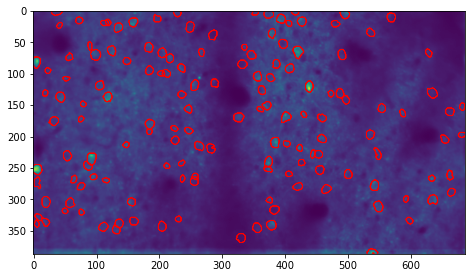

In [27]:
si = 1
mouse,plane,session = session_tuples[si]
plane_dir = base_dir / f'{mouse:03}/plane_{plane}/{session}/plane0'
roi_dir = plane_dir / 'roi'
final_roi_results_fn = f'final_roi_results_{mouse:03}_plane_{plane}_{session}_wo_dendrite_filtering.npy'
final_roi_results = np.load(roi_dir / final_roi_results_fn, allow_pickle=True).item()
ops = np.load(plane_dir / 'ops.npy', allow_pickle=True).item()
mean_img = ops['meanImg']
fig, ax = plt.subplots(figsize=(mean_img.shape[0]*0.02, mean_img.shape[1]*0.02))
ax.imshow(mean_img)
for i in range(final_roi_results['final_mask'].shape[-1]):
    ax.contour(final_roi_results['final_mask'][:,:,i], colors='r', linewidths=0.5)


In [17]:
np.where([session_tuple == st for st in session_tuples])

(array([1242], dtype=int64),)

In [11]:
from tqdm.notebook import tqdm
error_session_tuples = []
# for session_tuple in tqdm(session_tuples):
for i in tqdm(range(286, len(session_tuples))):
    session_tuple = session_tuples[i]
    mouse,plane,session = session_tuple
    plane_dir = base_dir / f'{mouse:03}/plane_{plane}/{session}/plane0'
    roi_dir = plane_dir / 'roi'
    final_roi_results_fn = f'final_roi_results_{mouse:03}_plane_{plane}_{session}_wo_dendrite_filtering.npy'
    final_roi_results = np.load(roi_dir / final_roi_results_fn, allow_pickle=True).item()
    try:
        ops = np.load(plane_dir / 'ops.npy', allow_pickle=True).item()
        mean_img = ops['meanImg']
        fig, ax = plt.subplots(figsize=(mean_img.shape[0]*0.02, mean_img.shape[1]*0.02))
        ax.imshow(mean_img)
        for i in range(final_roi_results['final_mask'].shape[-1]):
            ax.contour(final_roi_results['final_mask'][:,:,i], colors='r', linewidths=0.5)

        save_dir = base_dir / f'{mouse:03}/plane_{plane}' / 'roi_collection_test'
        save_dir.mkdir(exist_ok=True)
        fig.savefig(save_dir / f'{mouse:03}_plane_{plane}_{session}_wo_dendrite_filtering.png', dpi=300)
        plt.close(fig)
    except:
        error_session_tuples.append(session_tuple)
error_save_fn = Path(r'E:\TPM\JK\h5') / 'roi_collection_error.npy'
np.save(error_save_fn, error_session_tuples)

  0%|          | 0/1189 [00:00<?, ?it/s]

c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\matplotlib\image.py:446: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\matplotlib\image.py:451: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact
c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\matplotlib\image.py:503: RuntimeWarning: invalid value encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\matplotlib\image.py:504: RuntimeWarning: invalid value encountered in multiply
  vrange *= ((a_max - a_min) / frac)
c:\Users\shires\Anaconda3\envs\suite2p\lib\site-packages\matplotlib\image.py:479: RuntimeWarning: invalid value encountered in subtract
  A_scaled -= a_min


FileNotFoundError: [Errno 2] No such file or directory: 'E:\\TPM\\JK\\h5\\052\\plane_2\\001x\\plane0\\roi\\final_roi_results_052_plane_2_001x_wo_dendrite_filtering.npy'

In [19]:
error_save_fn = Path(r'E:\TPM\JK\h5') / 'roi_collection_error.npy'
np.save(error_save_fn, error_session_tuples)

In [5]:
session_tuples_52 = []
mouse = 52
for plane in planes:
    plane_dir = base_dir / f'{mouse:03}/plane_{plane}'
    sessions = [x.name for x in plane_dir.iterdir() if \
                x.is_dir() and x.name[0].isdigit() and x.name[-1].isdigit()]  #  and len(x.name) == 3
    # list of (mouse,plane,session) tuples
    for session in sessions:
        session_tuples_52.append((mouse,plane,session))

In [6]:
from tqdm.notebook import tqdm
error_session_tuples = []
# for session_tuple in tqdm(session_tuples):
for i in tqdm(range(len(session_tuples_52))):
    session_tuple = session_tuples_52[i]
    mouse,plane,session = session_tuple
    plane_dir = base_dir / f'{mouse:03}/plane_{plane}/{session}/plane0'
    roi_dir = plane_dir / 'roi'
    final_roi_results_fn = f'final_roi_results_{mouse:03}_plane_{plane}_{session}_wo_dendrite_filtering.npy'
    final_roi_results = np.load(roi_dir / final_roi_results_fn, allow_pickle=True).item()
    try:
        ops = np.load(plane_dir / 'ops.npy', allow_pickle=True).item()
        mean_img = ops['meanImg']
        fig, ax = plt.subplots(figsize=(mean_img.shape[0]*0.02, mean_img.shape[1]*0.02))
        ax.imshow(mean_img)
        for i in range(final_roi_results['final_mask'].shape[-1]):
            ax.contour(final_roi_results['final_mask'][:,:,i], colors='r', linewidths=0.5)

        save_dir = base_dir / f'{mouse:03}/plane_{plane}' / 'roi_collection_test'
        save_dir.mkdir(exist_ok=True)
        fig.savefig(save_dir / f'{mouse:03}_plane_{plane}_{session}_wo_dendrite_filtering.png', dpi=300)
        plt.close(fig)
    except:
        error_session_tuples.append(session_tuple)
print(len(error_session_tuples))
if len(error_session_tuples) > 0:
    error_save_fn = Path(r'E:\TPM\JK\h5') / 'roi_collection_error_052.npy'
    np.save(error_save_fn, error_session_tuples)

    

  0%|          | 0/264 [00:00<?, ?it/s]